In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
# from math import sqrt
# import math
# import scipy
# import scipy.ndimage
# from skimage.morphology import skeletonize as skelt
# from skimage.morphology import thin
# from google.colab.patches import cv2_imshow

#### Only 2000 images out of the 4000 images available in the NIST-4 database were used due to system constraints. These results wont be as accurate as the results mentioned in the research papers due to less data being used.

# KNN Model

### Importing Data

In [2]:
image_files = glob.glob1('D:/college/Research/NIST/Biometrics-Project-main/png_txt/half_data', '*.png')

X_knn,y = [], []
dir = 'D:/college/Research/NIST/Biometrics-Project-main/png_txt/half_data/'
for image in sorted(image_files):

  X_knn.append(plt.imread(dir+image).flatten())
  y.append(str(image[0]))

In [3]:
X_knn = np.array(X_knn)
y = np.array(y)

### Splitting the data

In [4]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y, test_size=0.4, random_state=42)

### Building and training the KNN Model

In [5]:
k_range = list(range(1,21))

param_grid={'n_neighbors' : k_range}
knn = KNeighborsClassifier()
model_knn = GridSearchCV(knn, param_grid, cv=10)

In [6]:
model_knn.fit(X_train_knn,y_train_knn)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [7]:
print('Best value of k is: ', model_knn.best_params_)

Best value of k is:  {'n_neighbors': 1}


### Accuracy

In [8]:
y_pred_knn = model_knn.predict(X_test_knn)
print(accuracy_score(y_pred_knn,y_test_knn))

0.26625


----------------------------

# Lenet 5 Architecture

### Importing and labelling the Data

In [2]:
image_files = glob.glob1('D:/college/Research/NIST/Biometrics-Project-main/png_txt/half_data', '*.png')

X_cnn_im,y_cnn_im = [], []
dir = 'D:/college/Research/NIST/Biometrics-Project-main/png_txt/half_data/'
for image in sorted(image_files):

  X_cnn_im.append(plt.imread(dir+image))
  y_cnn_im.append(str(image[0]))

In [3]:
# converting to numpy array
X_cnn = np.array(X_cnn_im)
y_cnn = np.array(y_cnn_im)

In [4]:
# Label Encoding the classes
import sklearn
from sklearn.preprocessing import LabelEncoder
encde=LabelEncoder()
y_cnn=encde.fit_transform(y_cnn)

### Splitting the data

In [5]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.25, random_state=42)

### Building the LeNet-5 Architecture and training the model

In [6]:
model_lenet = keras.Sequential()

model_lenet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(512,512,1)))
model_lenet.add(layers.AveragePooling2D())

model_lenet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_lenet.add(layers.AveragePooling2D())

model_lenet.add(layers.Flatten())

model_lenet.add(layers.Dense(units=120, activation='relu'))

model_lenet.add(layers.Dense(units=84, activation='relu'))

model_lenet.add(layers.Dense(units=5, activation = 'softmax'))

model_lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 6)       60        
                                                                 
 average_pooling2d (AverageP  (None, 255, 255, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 16)      880       
                                                                 
 average_pooling2d_1 (Averag  (None, 126, 126, 16)     0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 120)               3

In [7]:
model_lenet.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [8]:
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
    history_lenet = model_lenet.fit(X_train_cnn, y_train_cnn, batch_size=32, epochs=30, validation_split=0.15, verbose=1)

Epoch 1/30
20/20 [==============================] - 12s 257ms/step - loss: 3.4185 - accuracy: 0.2025 - val_loss: 1.6263 - val_accuracy: 0.2301
Epoch 2/30
20/20 [==============================] - 3s 167ms/step - loss: 1.6020 - accuracy: 0.2810 - val_loss: 1.5837 - val_accuracy: 0.2655
Epoch 3/30
20/20 [==============================] - 3s 168ms/step - loss: 1.4185 - accuracy: 0.4443 - val_loss: 1.3466 - val_accuracy: 0.4513
Epoch 4/30
20/20 [==============================] - 3s 169ms/step - loss: 0.8627 - accuracy: 0.7347 - val_loss: 1.2543 - val_accuracy: 0.5044
Epoch 5/30
20/20 [==============================] - 3s 168ms/step - loss: 0.3751 - accuracy: 0.9105 - val_loss: 1.2315 - val_accuracy: 0.4779
Epoch 6/30
20/20 [==============================] - 3s 169ms/step - loss: 0.1719 - accuracy: 0.9670 - val_loss: 1.2866 - val_accuracy: 0.4956
Epoch 7/30
20/20 [==============================] - 3s 168ms/step - loss: 0.0708 - accuracy: 0.9969 - val_loss: 1.2073 - val_accuracy: 0.5310
Epoch

In [9]:
print('test loss, test accuracy: ', model_lenet.evaluate(X_test_cnn, y_test_cnn))

8/8 [==============================] - 1s 63ms/step - loss: 1.5070 - accuracy: 0.5440
test loss, test accuracy:  [1.5069551467895508, 0.5440000295639038]


### LeNet-5 Training Visualisation

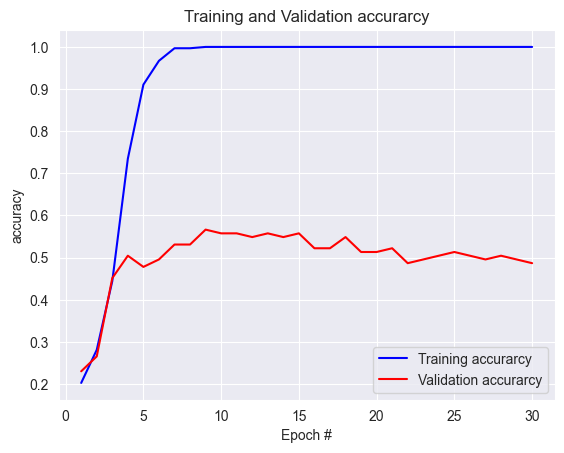

In [10]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history_lenet.history['accuracy']
val_acc = history_lenet.history['val_accuracy']
loss = history_lenet.history['loss']
val_loss = history_lenet.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

---

# AlexNet Architecture

In [5]:
# resizing the images for AlexNet
X_alex = []
for image in X_cnn_im:
    X_alex.append(cv.resize(image, (227,227)))

# converting to numpy array
X_alex = np.array(X_alex)

In [6]:
X_alex.shape

(1000, 227, 227)

### Splitting the data

In [7]:
X_train_alex, X_test_alex, y_train_alex, y_test_alex = train_test_split(X_alex, y_cnn, test_size=0.25, random_state=42)

### Building AlexNet architecture and training the model

In [8]:
model_alexnet = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation='softmax')
])

model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [9]:
model_alexnet.compile(loss=keras.metrics.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [10]:
with tf.device('/GPU:0'):
    history_alexnet = model_alexnet.fit(X_train_alex, y_train_alex, batch_size=32, epochs=30, validation_split=0.15, verbose=1)

Epoch 1/30
20/20 [==============================] - 10s 219ms/step - loss: 23.7445 - accuracy: 0.2261 - val_loss: 46.3275 - val_accuracy: 0.1858
Epoch 2/30
20/20 [==============================] - 2s 85ms/step - loss: 2.9874 - accuracy: 0.2245 - val_loss: 2.6707 - val_accuracy: 0.2035
Epoch 3/30
20/20 [==============================] - 2s 86ms/step - loss: 1.9687 - accuracy: 0.2261 - val_loss: 2.2395 - val_accuracy: 0.1947
Epoch 4/30
20/20 [==============================] - 2s 85ms/step - loss: 1.7285 - accuracy: 0.2370 - val_loss: 2.0559 - val_accuracy: 0.2124
Epoch 5/30
20/20 [==============================] - 2s 85ms/step - loss: 1.6687 - accuracy: 0.2276 - val_loss: 2.2500 - val_accuracy: 0.2301
Epoch 6/30
20/20 [==============================] - 2s 85ms/step - loss: 1.6435 - accuracy: 0.2669 - val_loss: 1.9760 - val_accuracy: 0.1681
Epoch 7/30
20/20 [==============================] - 2s 84ms/step - loss: 1.6653 - accuracy: 0.2166 - val_loss: 2.5748 - val_accuracy: 0.2301
Epoch 8/3

In [11]:
print('test loss, test accuracy: ', model_alexnet.evaluate(X_test_alex, y_test_alex))

8/8 [==============================] - 1s 158ms/step - loss: 24.8752 - accuracy: 0.1680
test loss, test accuracy:  [24.875205993652344, 0.1679999977350235]


### AlexNet Training Visualisation

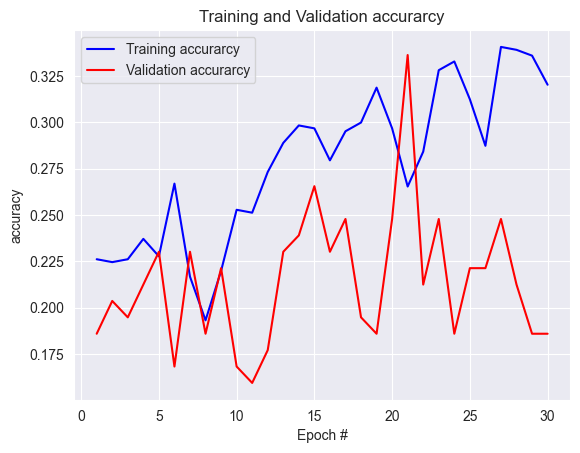

In [12]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history_alexnet.history['accuracy']
val_acc = history_alexnet.history['val_accuracy']
loss = history_alexnet.history['loss']
val_loss = history_alexnet.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


---

## Results:
### - KNN : Accuracy = 26.625%
### - LeNet-5 : Accuracy = 54.4%
### - AlexNet : Accuracy = 16.8%

### Lenet is clearly the best baseline model for images without any preprocessing but even this architecture overfits as we can see that the LeNet training accuracy becomes constant at 100% after epoch 10 but it's validation and test accuracy are very low. 
### This shows the need of using better architectures and preprocessed data where we input Orientation Maps of the fingerprints into the models.

---